# Creación Convolutional Autoencoder

In [5]:
import numpy as np
import os
import cv2
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import keras
from keras.utils import to_categorical
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [8]:
dirname = os.path.join(os.getcwd(), 'NEU-CLS-64')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)
for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            #image = plt.imread(filepath)
            image = cv2.imread(filepath)
            images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0

dircount.append(cant)
print("dircount ", dircount)
dircount = dircount[1:]
dircount[-1]=dircount[-1]+1

print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))


leyendo imagenes de  C:\Users\rsantacruz\Machine-Learning-II\Proyecto\NEU-CLS-64\
C:\Users\rsantacruz\Machine-Learning-II\Proyecto\NEU-CLS-64\cr 1
C:\Users\rsantacruz\Machine-Learning-II\Proyecto\NEU-CLS-64\gg 1210
C:\Users\rsantacruz\Machine-Learning-II\Proyecto\NEU-CLS-64\in 296
C:\Users\rsantacruz\Machine-Learning-II\Proyecto\NEU-CLS-64\pa 775
C:\Users\rsantacruz\Machine-Learning-II\Proyecto\NEU-CLS-64\ps 1148
C:\Users\rsantacruz\Machine-Learning-II\Proyecto\NEU-CLS-64\rp 797
C:\Users\rsantacruz\Machine-Learning-II\Proyecto\NEU-CLS-64\rs 200
C:\Users\rsantacruz\Machine-Learning-II\Proyecto\NEU-CLS-64\sc 1589
C:\Users\rsantacruz\Machine-Learning-II\Proyecto\NEU-CLS-64\sp 773
dircount  [1, 1210, 296, 775, 1148, 797, 200, 1589, 773, 437]
Directorios leidos: 9
Imagenes en cada directorio [1210, 296, 775, 1148, 797, 200, 1589, 773, 437]
suma Total de imagenes en subdirs: 7225


In [16]:
#Clases
neu_cls=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    neu_cls.append(name[len(name)-1])
    indice=indice+1


0 cr
1 gg
2 in
3 pa
4 ps
5 rp
6 rs
7 sc
8 sp


In [17]:
neu_cls

['cr', 'gg', 'in', 'pa', 'ps', 'rp', 'rs', 'sc', 'sp']

In [18]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

Cantidad etiquetas creadas:  7226


In [19]:
y = np.array(labels)
X = np.array(images) #convierto de lista a numpy

# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total numero de salidas : ', nClasses)
print('clases de las instacias : ', classes)

Total numero de salidas :  9
clases de las instacias :  [0 1 2 3 4 5 6 7 8]


In [20]:
X_train,test_X,y_train,test_y = train_test_split(X,y,test_size=0.2)

In [22]:
X_train, test_X = X_train / 255.0, test_X /255.0

In [24]:
# one hot encode our y variables of our data
y_train = to_categorical(y_train)

test_y = to_categorical(test_y)

In [25]:
#crear los grupos de entrenamiento y validacion
train_X,valid_X,train_y,valid_y = train_test_split(X_train, y_train, test_size=0.2, random_state=13)
print("train_X :", train_X.shape)
print("train_y :", train_y.shape)
print("valid_X :", valid_X.shape)
print("valid_y :", valid_y.shape)

train_X : (4624, 64, 64, 3)
train_y : (4624, 9)
valid_X : (1156, 64, 64, 3)
valid_y : (1156, 9)


In [41]:
input_img = Input(shape=(64, 64, 3)) 

x = Conv2D(32, (3, 3),
 activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
encoded =  x  

#  decoder

x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
up_sampling2d_20 (UpSampling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 64, 64, 3)         867       
Total params: 11,011
Trainable params: 11,011
Non-trainable params: 0
______________________________________________________

In [42]:
autoencoder.fit(train_X, train_X,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(valid_X, valid_X))

Train on 4624 samples, validate on 1156 samples
Epoch 1/50
4624/4624 [==============================] - 39s 9ms/step - loss: 0.6627 - val_loss: 0.6405
Epoch 2/50
4624/4624 [==============================] - 33s 7ms/step - loss: 0.6408 - val_loss: 0.6330
Epoch 3/50
4624/4624 [==============================] - 34s 7ms/step - loss: 0.6197 - val_loss: 0.6323
Epoch 4/50
4624/4624 [==============================] - 34s 7ms/step - loss: 0.6143 - val_loss: 0.6056
Epoch 5/50
4624/4624 [==============================] - 34s 7ms/step - loss: 0.6105 - val_loss: 0.6140
Epoch 6/50
4624/4624 [==============================] - 36s 8ms/step - loss: 0.6083 - val_loss: 0.6081
Epoch 7/50
4624/4624 [==============================] - 36s 8ms/step - loss: 0.6074 - val_loss: 0.6081
Epoch 8/50
4624/4624 [==============================] - 37s 8ms/step - loss: 0.6070 - val_loss: 0.6047
Epoch 9/50
4624/4624 [==============================] - 38s 8ms/step - loss: 0.6061 - val_loss: 0.6028
Epoch 10/50
4624/4624 [==

In [43]:
score = autoencoder.evaluate(test_X, test_X, verbose=0)
print('Test loss:', score)

Test loss: 0.5949421731927748


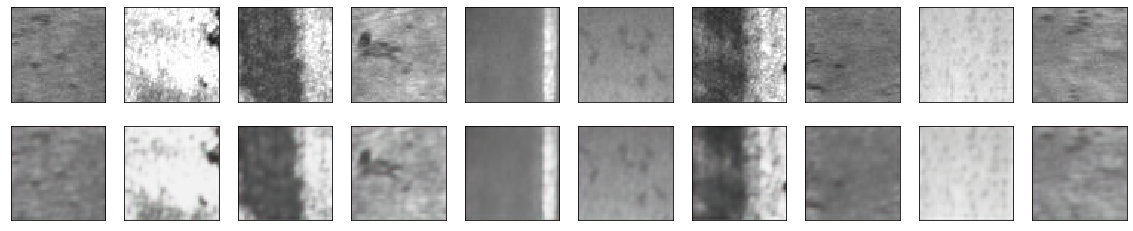

In [44]:
decoded_imgs = autoencoder.predict(test_X)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(test_X[i].reshape(64, 64,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    

    # display reconstruction
    #ax = plt.subplot(2, n, i + 1)
    ax = plt.subplot(2, n, n + i + 1)
    plt.imshow(decoded_imgs[i].reshape(64, 64,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    
plt.show()

# Predicción con el Encoder

In [50]:
encoder = Model(input_img, encoded)
encoder.summary()

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 32, 32, 32)        0         
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


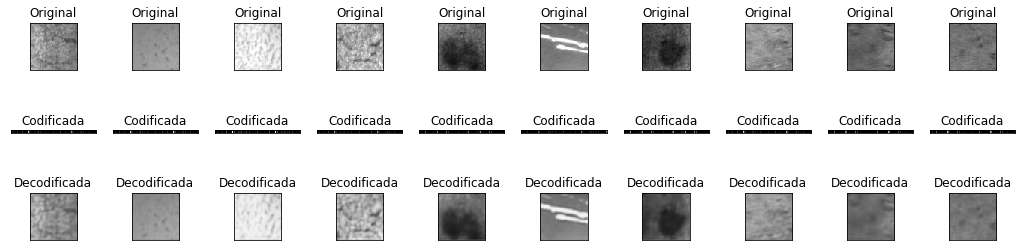

In [68]:
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(test_X.shape[0], size=num_images)

encoded_imgs = encoder.predict(test_X)
decoded_imgs = autoencoder.predict(test_X)
#decoded_imgs = decoder.predict(encoded_imgs)

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(test_X[image_idx].reshape(64,64,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("Original")
    plt.subplots_adjust(hspace = .8)
    
    # plot encoded image
    ax = plt.subplot(3, num_images, num_images + i + 1)
    plt.imshow(encoded_imgs[image_idx].reshape(32,32*32))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("Codificada")
 
   
    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(64,64,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("Decodificada")
plt.show()

In [78]:
#Guardar modelo encoder
encoder.save('encoder.h5')